Fraud Detection Metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      7000
         1.0       0.73      0.73      0.73      3000

    accuracy                           0.84     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.84      0.84      0.84     10000



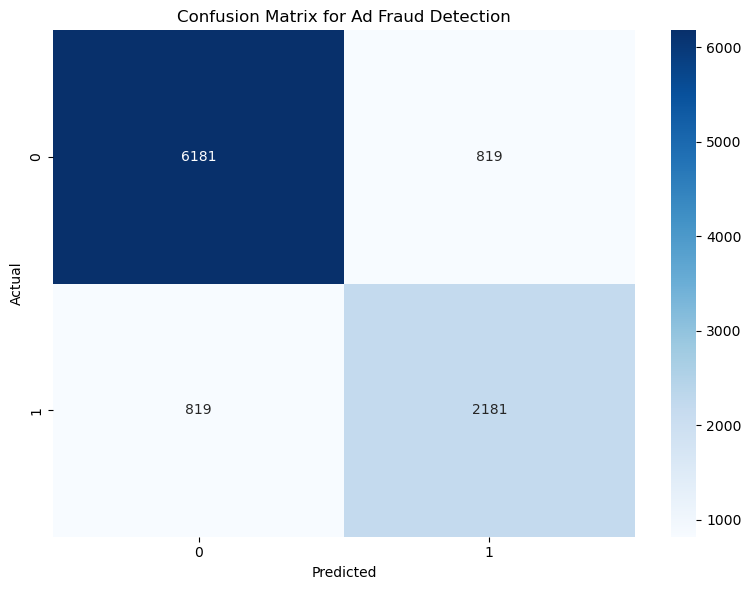

Fraud Cluster Analysis:
         click_duration  time_of_day  user_interaction_depth  \
cluster                                                        
16             2.003287    18.426882                     1.0   
17             1.986785    18.806317                     0.0   
18             2.102759    20.249778                     2.0   
19             1.416787     3.435073                     2.0   
20             2.092506    13.518358                     3.0   
21             1.555793     7.501995                     3.0   
22             1.389166     9.540861                     3.0   
23             1.852841    32.282060                     2.0   
24             2.057116    11.907867                     1.0   
25             1.973237    16.458439                     2.0   
26             2.373651     1.706985                     2.0   
27             2.739682    25.850146                     0.0   
28             3.233308    12.711746                     1.0   
29             0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import random

# Synthetic Dataset Generation
class AdTrafficSimulator:
    def __init__(self, n_samples=10000):
        self.n_samples = n_samples
        self.dataset = None
    
    def generate_dataset(self):
        """
        Generate synthetic ad traffic dataset with both legitimate and fraudulent traffic
        
        Features:
        1. Click Duration
        2. Time of Day
        3. User Interaction Depth
        4. Geolocation Consistency
        5. Device Fingerprint Variability
        6. Click Frequency
        7. Referral Source
        """
        np.random.seed(42)
        
        # Legitimate Traffic Characteristics
        click_duration = np.concatenate([
            np.random.normal(10, 3, int(self.n_samples * 0.7)),  # Legitimate clicks
            np.random.normal(2, 1, int(self.n_samples * 0.3))    # Potential bot clicks
        ])
        
        time_of_day = np.concatenate([
            np.random.uniform(0, 24, int(self.n_samples * 0.7)),  # Natural distribution
            np.random.uniform(0, 24, int(self.n_samples * 0.3)) * 1.5  # Suspicious timing
        ])
        
        user_interaction_depth = np.concatenate([
            np.random.poisson(3, int(self.n_samples * 0.7)),     # Normal user behavior
            np.random.poisson(1, int(self.n_samples * 0.3))      # Limited interactions
        ])
        
        geolocation_consistency = np.concatenate([
            np.random.normal(0.8, 0.1, int(self.n_samples * 0.7)),  # Consistent location
            np.random.normal(0.3, 0.2, int(self.n_samples * 0.3))   # Inconsistent location
        ])
        
        device_variability = np.concatenate([
            np.random.normal(0.7, 0.1, int(self.n_samples * 0.7)),  # Natural device variation
            np.random.normal(0.1, 0.05, int(self.n_samples * 0.3))  # Suspicious device patterns
        ])
        
        click_frequency = np.concatenate([
            np.random.poisson(2, int(self.n_samples * 0.7)),     # Normal click rates
            np.random.poisson(10, int(self.n_samples * 0.3))     # Abnormal click rates
        ])
        
        # Labels: 0 for legitimate, 1 for fraudulent
        labels = np.concatenate([
            np.zeros(int(self.n_samples * 0.7)),
            np.ones(int(self.n_samples * 0.3))
        ])
        
        # Create DataFrame
        self.dataset = pd.DataFrame({
            'click_duration': click_duration,
            'time_of_day': time_of_day,
            'user_interaction_depth': user_interaction_depth,
            'geolocation_consistency': geolocation_consistency,
            'device_variability': device_variability,
            'click_frequency': click_frequency,
            'is_fraudulent': labels
        })
        
        return self.dataset

# Fraud Detection Model
class AdFraudDetector:
    def __init__(self, dataset):
        self.dataset = dataset
        self.X = None
        self.y = None
        self.model = None
    
    def prepare_data(self):
        # Separate features and labels
        self.X = self.dataset.drop('is_fraudulent', axis=1)
        self.y = self.dataset['is_fraudulent']
        
        # Scale features
        scaler = StandardScaler()
        self.X_scaled = scaler.fit_transform(self.X)
    
    def train_isolation_forest(self):
        # Unsupervised Anomaly Detection
        self.model = IsolationForest(contamination=0.3, random_state=42)
        self.model.fit(self.X_scaled)
    
    def evaluate_model(self):
        # Predict anomalies
        y_pred = self.model.predict(self.X_scaled)
        y_pred = np.where(y_pred == 1, 0, 1)  # Convert predictions
        
        print("Fraud Detection Metrics:")
        print(classification_report(self.y, y_pred))
        
        # Confusion Matrix Visualization
        cm = confusion_matrix(self.y, y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix for Ad Fraud Detection')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.show()

# Advanced Clustering for Fraud Patterns
class FraudPatternAnalyzer:
    def __init__(self, dataset):
        self.dataset = dataset
        self.X_scaled = StandardScaler().fit_transform(
            dataset.drop('is_fraudulent', axis=1)
        )
    
    def detect_fraud_clusters(self):
        # DBSCAN for identifying dense fraud clusters
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        clusters = dbscan.fit_predict(self.X_scaled)
        
        # Analyze cluster characteristics
        self.dataset['cluster'] = clusters
        fraud_clusters = self.dataset[
            (self.dataset['is_fraudulent'] == 1) & 
            (self.dataset['cluster'] != -1)
        ]
        
        print("Fraud Cluster Analysis:")
        print(fraud_clusters.groupby('cluster').mean())

# Main Execution
def main():
    # Simulate Ad Traffic
    simulator = AdTrafficSimulator(n_samples=10000)
    dataset = simulator.generate_dataset()
    
    # Fraud Detection
    detector = AdFraudDetector(dataset)
    detector.prepare_data()
    detector.train_isolation_forest()
    detector.evaluate_model()
    
    # Advanced Clustering
    pattern_analyzer = FraudPatternAnalyzer(dataset)
    pattern_analyzer.detect_fraud_clusters()

if __name__ == "__main__":
    main()